In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('data.csv')

In [3]:
col_list=list(data.columns)

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
class_0,class_1=data.DEATH_EVENT.value_counts()

In [6]:
cnt=data.DEATH_EVENT.value_counts()

<BarContainer object of 2 artists>

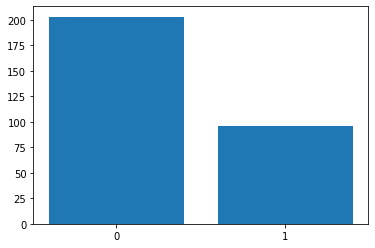

In [7]:
plt.bar(['0','1'],cnt)

Resampling to Balance Data

In [8]:
df_class_0=data[data['DEATH_EVENT']==0]
df_class_1=data[data['DEATH_EVENT']==1]

In [9]:
df_class_1 =df_class_1.sample(class_0,replace=True)

In [10]:
df_class_1=df_class_1.reset_index(drop=True)

In [11]:
data=pd.concat([df_class_0,df_class_1],axis=0).reset_index()

In [12]:
data.dropna(axis=0,inplace=True)

Machine Learning Models

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
sc=StandardScaler()

In [15]:
scale_data=data.drop(['DEATH_EVENT','index'],axis=1)

In [16]:
scale_data=pd.DataFrame(sc.fit_transform(scale_data),columns=col_list[:-1])

In [17]:
cor=scale_data.corr()

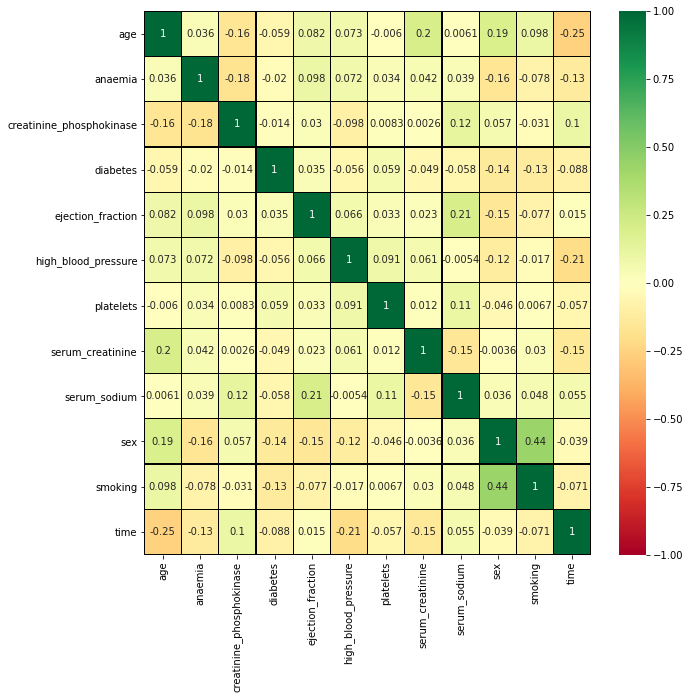

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(cor,vmin=-1,vmax=1,center=0,annot=True,cmap='RdYlGn',linecolor='black',linewidths=0.2)

In [19]:
scale_data['DEATH_EVENT']=data.DEATH_EVENT

In [20]:
len(col_list)

13

In [21]:
X=scale_data.iloc[:,:-1]
y=scale_data['DEATH_EVENT']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
logi=LogisticRegression().fit(X_train,y_train)
y_pred=logi.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred)

0.761904761904762

In [24]:
decisionTree=DecisionTreeClassifier()
decisionTree.fit(X_train,y_train)
y_pred=decisionTree.predict(X_test)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.9195402298850575

In [25]:
rForest=RandomForestClassifier()
rForest.fit(X_train,y_train)
y_pred=rForest.predict(X_test)
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.9512195121951219